# Project Two: A Subreddit Analysis of the Republican and Democratic Parties Using Classification Models

## Executive Summary

Tasked with evalauting patterns in the r/Republican and r/democrats subreddit, I created a model that predicted with about 70% accuracy on whether a particular set of words or phrases could determine whether someone posted in the democrat or Republican subreddits. Based on the performance of the model, I recommend that further analysis be taken to give weight to certain words based on whether they use those words in a positive or negative way. For example, is President Trump used in more positive phrases or negative ones.

## Step 1: Define the problem.

As a political analyst for *Bring Back Democracy*, I have been asked to analyze the subreddits for Republicans and Democrats of [Reddit.com](https://www.reddit.com/).

My analysis involved reviewing the most prevelent topics of interest for each group to identify similarities and differences and, most importantly, to be able to predict classify future topics by political party. In this way, we will be able to better understand the interests of each party on an ongoing basis.

The question we wanted to answer is:


> Is the content in each political party's subreddit enough to predict which political party users are affiliated with?

## Step 2: Data Collection (Keep Commented Areas Commented to Run All)

### Import Libraries

In [1]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import requests

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [2]:
# change max rows to 999
pd.options.display.max_rows = 3000

In [3]:
# change max columns to 999
pd.options.display.max_columns = 999

#### Subreddit - r/Republican

In [4]:
# # grab URL
# base_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=Republican'

# # set up response params
# # check out other parameter options: https://github.com/pushshift/api
# params = {'subreddit': 'Republican',
#         'size': 500
#         }

# res = requests.get(base_url, params)
# res.status_code
# data = res.json()
# posts = data['data']

# # turn all post information into a DataFrame
# # this is possible because it is a list of dictionaries
# df = pd.DataFrame(posts)

# # # # Only take features relevant to the project
# # # These are the ones I think I want
# # df = df[['subreddit', 'title', 'selftext', 'created_utc']]

# # # export to csv for combining
# df.to_csv('republican1.csv', index=False)

In [5]:
# # sort from oldest to newest
# df['created_utc'].sort_values(ascending=True).head()

In [6]:
# # grab URL
# base_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=Republican'

# # set up response params
# # check out other parameter options: https://github.com/pushshift/api
# params = {'subreddit': 'Republican',
#         'size': 500,
#         'before': 1585110210 # insert new timestamp
#         }

# res = requests.get(base_url, params)
# res.status_code
# data = res.json()
# posts = data['data']

# # turn all post information into a DataFrame
# # this is possible because it is a list of dictionaries
# df = pd.DataFrame(posts)

# # # Only take features relevant to the project
# # df = df[['subreddit', 'title', 'selftext', 'created_utc']]

# # export to csv for combining
# df.to_csv('republican99.csv', index=False) # don't forget to change this

In [7]:
# # sort from oldest to newest
# df['created_utc'].sort_values(ascending=True).head()

#### Subreddit - r/democrats

In [8]:
# # grab URL
# base_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=democrats'

# # set up response params
# # check out other parameter options: https://github.com/pushshift/api
# params = {'subreddit': 'democrats',
#         'size': 500
#         }

# res = requests.get(base_url, params)
# res.status_code
# data = res.json()
# posts = data['data']

# # turn all post information into a DataFrame
# # this is possible because it is a list of dictionaries
# df = pd.DataFrame(posts)

# # # # Only take features relevant to the project
# # # These are the ones I think I want
# # df = df[['subreddit', 'title', 'selftext', 'created_utc']]

# # # export to csv for combining
# df.to_csv('democrats1.csv', index=False)

In [9]:
# # sort from oldest to newest
# df['created_utc'].sort_values(ascending=True).head()

In [10]:
# # grab URL
# base_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=democrats'

# # set up response params
# # check out other parameter options: https://github.com/pushshift/api
# params = {'subreddit': 'democrats',
#         'size': 500,
#         'before': 1583537826 # insert new timestamp
#         }

# res = requests.get(base_url, params)
# res.status_code
# data = res.json()
# posts = data['data']

# # turn all post information into a DataFrame
# # this is possible because it is a list of dictionaries
# df = pd.DataFrame(posts)

# # # Only take features relevant to the project
# # df = df[['subreddit', 'title', 'selftext', 'created_utc']]

# # export to csv for combining
# df.to_csv('democrats99.csv', index=False) # don't forget to change this

In [11]:
# # sort from oldest to newest
# df['created_utc'].sort_values(ascending=True).head()

## Step 3: Data Cleaning & EDA.

#### Convert CSV Files to DataFrame and Merge

In [12]:
# df1 = pd.read_csv('republican1.csv')
# df2 = pd.read_csv('republican2.csv')
# df3 = pd.read_csv('republican3.csv')
# df4 = pd.read_csv('republican4.csv')
# df5 = pd.read_csv('republican5.csv')
# df6 = pd.read_csv('republican6.csv')
# df7 = pd.read_csv('republican7.csv')
# df8 = pd.read_csv('republican8.csv')
# df9 = pd.read_csv('republican9.csv')
# df10 = pd.read_csv('republican10.csv')
# df11 = pd.read_csv('republican11.csv')
# df12 = pd.read_csv('republican12.csv')
# df13 = pd.read_csv('republican13.csv')
# df14 = pd.read_csv('republican14.csv')
# df15 = pd.read_csv('republican15.csv')
# df16 = pd.read_csv('republican16.csv')
# df17 = pd.read_csv('republican17.csv')
# df18 = pd.read_csv('republican18.csv')
# df19 = pd.read_csv('republican19.csv')
# df20 = pd.read_csv('republican20.csv')
# df_rep = pd.concat([df1,df2,df3,df4,df5,
#               df6,df7,df8,df9,df10, df11,
#               df12, df13, df14, df15, df16,
#               df17, df18, df19, df20])

In [13]:
# df1 = pd.read_csv('democrats1.csv')
# df2 = pd.read_csv('democrats2.csv')
# df3 = pd.read_csv('democrats3.csv')
# df4 = pd.read_csv('democrats4.csv')
# df5 = pd.read_csv('democrats5.csv')
# df6 = pd.read_csv('democrats6.csv')
# df7 = pd.read_csv('democrats7.csv')
# df8 = pd.read_csv('democrats8.csv')
# df9 = pd.read_csv('democrats9.csv')
# df10 = pd.read_csv('democrats10.csv')
# df11 = pd.read_csv('democrats11.csv')
# df12 = pd.read_csv('democrats12.csv')
# df13 = pd.read_csv('democrats13.csv')
# df14 = pd.read_csv('democrats14.csv')
# df15 = pd.read_csv('democrats15.csv')
# df16 = pd.read_csv('democrats16.csv')
# df17 = pd.read_csv('democrats17.csv')
# df18 = pd.read_csv('democrats18.csv')
# df19 = pd.read_csv('democrats19.csv')
# df20 = pd.read_csv('democrats20.csv')
# df_dem = pd.concat([df1,df2,df3,df4,df5,
#               df6,df7,df8,df9,df10, df11,
#               df12, df13, df14, df15, df16,
#               df17, df18, df19, df20])

In [14]:
# df = pd.concat([df_rep, df_dem])

#### Export Merged DataFrame

In [15]:
# df.to_csv('combined.csv', index=False)

#### Create Initial DataFrame

In [16]:
pwd

'/Users/ianirizarry/Desktop/DSIR/Submissions/project_3-master'

In [17]:
# df = pd.read_csv('./data/combined.csv')

#### Explore and Clean Data

In [18]:
# df.isnull().mean() * 100

In [19]:
# df.shape

In [20]:
# df = df.loc[:, df.isnull().mean() < .30]

In [21]:
# df.shape

In [22]:
# # Convert all columns to lowercase and replace spaces in column names.
# df.columns.str.lower().str.replace(' ', '_')

In [23]:
# df.isnull().sum()

In [24]:
# df.dropna(inplace=True)

In [25]:
# df.isnull().sum()

In [26]:
# df.dtypes

### Export Cleaned Data as CSV

In [27]:
# # export the cleaned version of the data
# df.to_csv('clean.csv', index=False)

## Step 4: Preprocessing & Modeling.

### Import Cleaned Data CSV

In [28]:
df = pd.read_csv('clean.csv', usecols=['subreddit', 'title'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19374 entries, 0 to 19373
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  19374 non-null  object
 1   title      19374 non-null  object
dtypes: object(2)
memory usage: 302.8+ KB


In [32]:
democrats = df[df['subreddit'] == 'democrats'].shape
Republican = df[df['subreddit'] == 'Republican'].shape

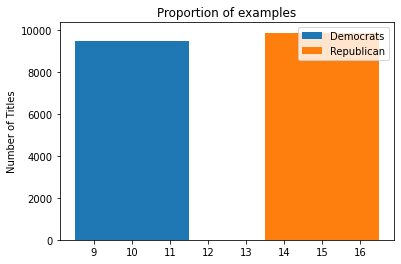

In [33]:
# credit: https://www.kaggle.com/itratrahman/nlp-tutorial-using-python
plt.xticks()
plt.bar(10,democrats,3, label="Democrats")
plt.bar(15,Republican,3, label="Republican")
plt.legend()
plt.ylabel('Number of Titles')
plt.title('Proportion of examples')
plt.show()

In [ ]:
# set up my X and y
X = df['title']
y = df['subreddit'].map({'Republican': 1, 'democrats': 0})

In [ ]:
# baseline
y.value_counts(normalize=True)

In [ ]:
lemmatizer = WordNetLemmatizer()
def clean_strings(title):
    title = re.sub("[^a-zA-Z]", " ", title.lower().strip()).split()
    title = [lemmatizer.lemmatize(i) for i in title]
    right_words = [w for w in title if w not in stopwords.words('english')]
    return (" ".join(right_words))
df['title'] = df['title'].apply(clean_strings)

In [ ]:
# # uncomment to run while loop
# # Credit: I cannot remember where I found this.
# # Print most common word
# n_print = int(input("How many most common words to print: "))
# print("\nOK. The {} most common words are as follows\n".format(n_print))
# word_counter = collections.Counter(df['title'])
# for word, count in word_counter.most_common(n_print):
#     print(f'{word}:{count}')

### Split Train-Test

In [ ]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42,
                                                    stratify=y)

### Logistic Regression

In [ ]:
# lr_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('lr',LogisticRegression())])
# lr_pipe = lr_pipe.fit(X_train, y_train)

In [ ]:
pipe_lr_tf = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

params_lr_tf = {
    'tf__stop_words':   [None, 'english'],
    'tf__max_features': [4900, 5000, 5100], 
    'tf__ngram_range':  [(1,5), (2,3), (3,3)],
    'lr__random_state': [42] 
}
gs_lr_tf = GridSearchCV(pipe_lr_tf, 
                        param_grid=params_lr_tf,
                        cv=5,
                        n_jobs=2,
                        verbose=1)

gs_lr_tf.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_lr_tf.best_params_}')
print('Train Score:', gs_lr_tf.score(X_train, y_train))
print('Test Score:', gs_lr_tf.score(X_test, y_test))
print('Best Score:', gs_lr_tf.best_score_)

### Multinomial Naïve Bayes Classifier

In [ ]:
pipe_multinomial_nb_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('multinomial_nb', MultinomialNB())
])

params_multinomial_nb_cvec = {
    'cvec__stop_words':           [None, 'english'],
    'cvec__max_features':         [7300,7325,7350], 
    'cvec__ngram_range':          [(1, 3), (1, 4), (1, 5)],
    'multinomial_nb__alpha':     [5], 
    'multinomial_nb__fit_prior': [True, False]
}

gs_multinomial_nb_cvec = GridSearchCV(pipe_multinomial_nb_cvec, 
                        param_grid=params_multinomial_nb_cvec,
                        cv=5,
                        n_jobs=2,
                        verbose=1)
    
gs_multinomial_nb_cvec.fit(X_train, y_train)

print(f'GridSearch Best Params:{gs_multinomial_nb_cvec.best_params_}')
print('Train Score:', gs_multinomial_nb_cvec.score(X_train, y_train))
print('Test Score:', gs_multinomial_nb_cvec.score(X_test, y_test))
print('Best Score:', gs_multinomial_nb_cvec.best_score_)

### Confusion Matrix

In [ ]:
def conf_matrix(model, X_test, y_test):
    y_hat = model.predict(X_test) 
    # get confusion matrix data
    cm = confusion_matrix(y_test, y_hat)  
    # extract elements of confusion matrix
    tn, fp, fn, tp = cm.ravel()           
    
    # Convert Confusion Matrix to DataFrame
    cm_df = pd.DataFrame(cm, columns = ['Predict r/democrats (y=0)', 'Predict r/Republican (y=1)'], index = ['Actual r/democrats (y=0)', 'Actual r/Republican (y=1)'])
    return cm_df
    
def conf_matrix_metrics(model, X_test, y_test):
    y_hat = model.predict(X_test) 
    cm = confusion_matrix(y_test, y_hat)  
    tn, fp, fn, tp = cm.ravel()           
    
    #calculate metrics 
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn/ (tn + fp)
    precision = tp /(tp + fp)
    
    return {'accuracy': np.round(accuracy,3),
            'sensitivity': np.round(sensitivity,3),
            'specificity': np.round(specificity,3),
            'precision': np.round(precision,3)}

In [ ]:
# Logistic Regression Confusion Matrix
print(conf_matrix_metrics(gs_lr_tf, X_test, y_test))
conf_matrix(gs_lr_tf, X_test, y_test)

In [ ]:
# Multinomial Naïve Bayes Classifier Confusion Matrix
print(conf_matrix_metrics(gs_multinomial_nb_cvec, X_test, y_test))
conf_matrix(gs_multinomial_nb_cvec, X_test, y_test)

In [ ]:
# get the words and their coefficients with the largest predictive values for Republican
pos_coef=pd.DataFrame(
list(zip(gs_lr_tf.best_estimator_[0].get_feature_names(),(gs_lr_tf.best_estimator_[1].coef_[0]))),
columns=['word','coef']).sort_values('coef',ascending=False).head(50)

In [ ]:
gs_lr_tf.best_estimator_

In [ ]:
# get the words and their coefficients with the least predictive values for Republican
neg_coef=pd.DataFrame(
# list(zip(gs_lr_tf.best_estimator_[0].get_feature_names(),(gs_lr_tf.best_estimator_[1].coef_[0]))),
#  columns=['word','coef']).sort_values('coef',ascending=True).head(5)
list(zip(gs_lr_tf.best_estimator_[0].get_feature_names(),(gs_lr_tf.best_estimator_[1].coef_[0]))),
 columns=['word','coef']).sort_values('coef',ascending=True).head(50)

In [ ]:
# convert the positive coefficients into probabilities
neg_coef['probs']=np.exp(neg_coef['coef'])/(1+np.exp(neg_coef['coef']))
neg_coef

In [ ]:
# convert the positive coefficients into probabilities
pos_coef['probs']=np.exp(pos_coef['coef'])/(1+np.exp(pos_coef['coef']))
pos_coef

## Step 5: Evaluation

In [ ]:
# establish baseline estimator
y_test.value_counts(normalize=True)

# our Null is 48.9%

In [ ]:
print('Logistic Regression Training Score:', round(gs_lr_tf.score(X_train, y_train), 3))
print('Multinomial Naïve Bayes Training Score:', round(gs_multinomial_nb_cvec.score(X_train, y_train), 3))
print()
print('Logistic Regression Test Score:', round(gs_lr_tf.score(X_test, y_test), 3))
print('Multinomial Naïve Bayes Test Score:', round(gs_multinomial_nb_cvec.score(X_test, y_test), 3))
print()
print('Logistic Regression Best Score:', round(gs_lr_tf.best_score_, 4))
print('Multinomial Naïve Bayes Best Score:', round(gs_multinomial_nb_cvec.best_score_, 4))
print()
print('Logistic Regression Classification Metrics:', conf_matrix_metrics(gs_lr_tf, X_test, y_test))
print('Multinomial Classification Metrics:', conf_matrix_metrics(gs_multinomial_nb_cvec, X_test, y_test))

## Prediction Testing

In [ ]:
# Import 
df = pd.read_csv('clean.csv', usecols=['subreddit', 'title'])

In [ ]:
# use this cell to index to the sample id pulled below. This way, you can confirm that the machine is predicting properly.
df['title'][12988]

In [ ]:
# pull 10 random sample from the df
df_elements = df.sample(n=10)

In [ ]:
df_elements

In [ ]:
# use the sample above to see if the model can predict where it comes from
print(gs_lr_tf.predict(['Twitter announced Friday']))

## Step 6: Conclusion & Recommendation

Tasked with analyzing the subreddits r/Republican and r/democrats, I sought out to identify patterns in both subreddits to see if I can predict what posts fell into which category.

Below are the scores for each model followed by the classification metrics below:

**Baseline Score**
1    0.510479
0    0.489521

**Logistic Regression Training Score:** 0.801
**Multinomial Naïve Bayes Training Score:** 0.769

**Logistic Regression Test Score:** 0.691
**Multinomial Naïve Bayes Test Score:** 0.688

**Logistic Regression Best Score:** 0.7042
**Multinomial Naïve Bayes Best Score:** 0.6978

**Logistic Regression Classification Metrics:** {'accuracy': 0.691, 'sensitivity': 0.708, 'specificity': 0.673, 'precision': 0.693}
**Multinomial Classification Metrics:** {'accuracy': 0.688, 'sensitivity': 0.653, 'specificity': 0.723, 'precision': 0.711}**

What these scores indicate is that the model was able to beat the baseline but definitely needs some work.

My recommendation from this point would be to find ways to apply weights to certain words so that they give a stronger probability of correctly predicting one subreddit over the other.